In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### About the data:

The real estate markets, like those in Sydney and Melbourne, present an interesting opportunity for data analysts to analyze and predict where property prices are moving towards. Prediction of property prices is becoming increasingly important and beneficial. Property prices are a good indicator of both the overall market condition and the economic health of a country.

#### Columns:

- Date: Date when the house is ready for sale. 
- Price: Price of the house to be sold.
- Bedrooms: No. of bedrooms in the house.
- Bathrooms: No. of bathrooms in the house.
- Sqft_living: Squarefoot of Living in the house.
- Sqft_lot: Squarefoot of Floor in the house. 
- Floors: Floors on which living area located. 
- Waterfront: If waterfront available in front of house.
- View: Vie from the house.
- Condition: Condition of the house.
- Sqft_above: Squarefoot above is the space available at roof. 
- Sqft_basement: Squarefoot basement is the space available at the basement.
- Yr_built: In which year the house is built.
- Yr_renovated: Year of renovation.
- Street: On which street house is located.
- City: City in which the country is located.
- Statezip: Zip code of the area in which house is located.
- Country: Country is US.

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
df = data.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

### Observation: we have 5 categorical futures 

In [6]:
# missing values 
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

### Observation: No Null values 

In [7]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


### Observation: Null values replaced with Zeroes 

In [8]:
df[df==0].count()

date                0
price              49
bedrooms            2
bathrooms           2
sqft_living         0
sqft_lot            0
floors              0
waterfront       4567
view             4140
condition           0
sqft_above          0
sqft_basement    2745
yr_built            0
yr_renovated     2735
street              0
city                0
statezip            0
country             0
dtype: int64

## 1- Clean numerical data



In [10]:
# remove unknown Y (price):
df = df[df['price']  != 0]

In [11]:
df[df==0].count()

date                0
price               0
bedrooms            2
bathrooms           2
sqft_living         0
sqft_lot            0
floors              0
waterfront       4521
view             4103
condition           0
sqft_above          0
sqft_basement    2718
yr_built            0
yr_renovated     2706
street              0
city                0
statezip            0
country             0
dtype: int64

In [12]:
# remove unknown bedrooms, bathrooms (only 2 rows each):
df = df[df['bedrooms']  != 0]
df = df[df['bathrooms']  != 0]

In [13]:
df[df==0].count()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       4519
view             4102
condition           0
sqft_above          0
sqft_basement    2716
yr_built            0
yr_renovated     2706
street              0
city                0
statezip            0
country             0
dtype: int64

In [14]:
df['view'].value_counts()

0    4102
2     200
3     115
1      69
4      63
Name: view, dtype: int64

### Observation: Other Zeroes has meaning (not null) 

<AxesSubplot:>

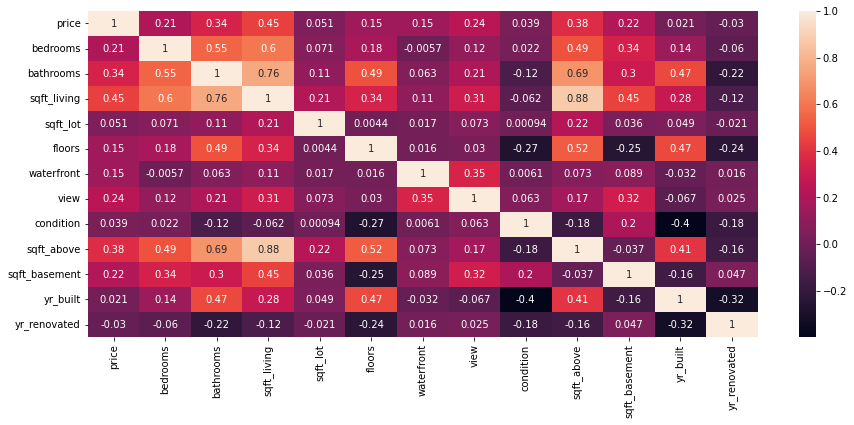

In [15]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), annot=True)

### Observation: (sqft_lot, yr_built,  yr_renovated) has very low correlation 

<AxesSubplot:xlabel='price', ylabel='Count'>

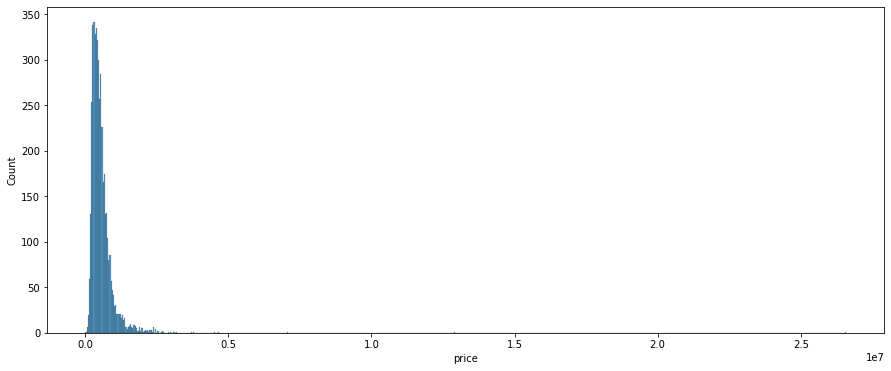

In [16]:
plt.figure(figsize=(15,6))

sns.histplot(data=df, x='price')

<AxesSubplot:xlabel='price'>

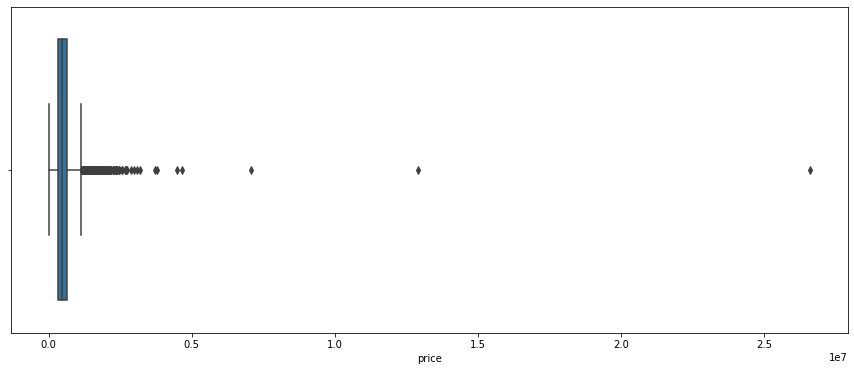

In [17]:
plt.figure(figsize=(15,6))

sns.boxplot(data=df, x='price')

### Observation: There are many outliers 

In [18]:
# Remove outliers: 
from scipy import stats

df = df[np.abs(stats.zscore(df['price']) < 3)]
# or df = df[(stats.zscore(df['price']) < 3) & (stats.zscore(df['price']) > -3)]

df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA


<AxesSubplot:xlabel='price', ylabel='Count'>

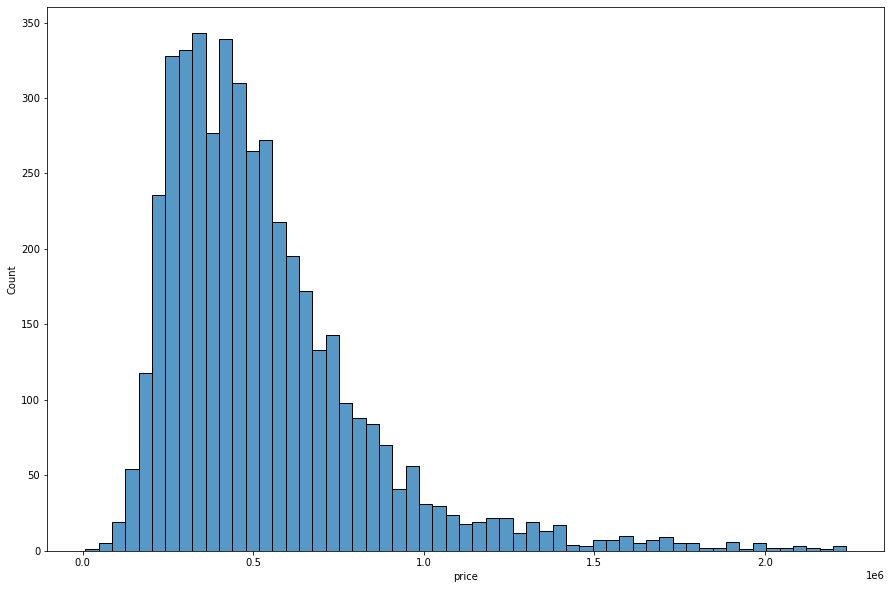

In [19]:
plt.figure(figsize=(15,10))

sns.histplot(data=df, x='price')

### Observation: No outliers 

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

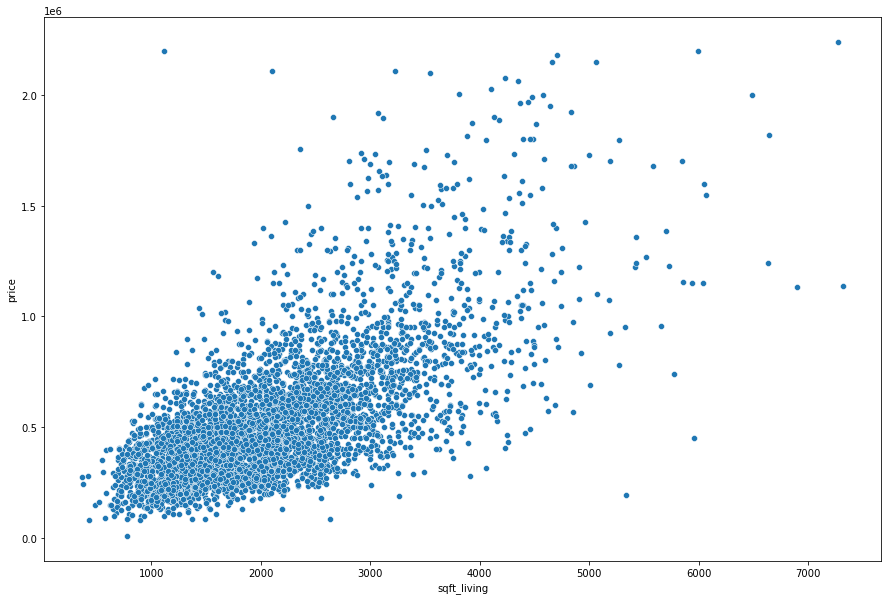

In [20]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x='sqft_living',y='price')

### Observation: There are many outliers 

In [21]:
# replace outliers with (6000)

# np.where(If condition, if true, if False)
df['sqft_living'] = np.where(df.sqft_living > 6000, 6000, df.sqft_living)

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

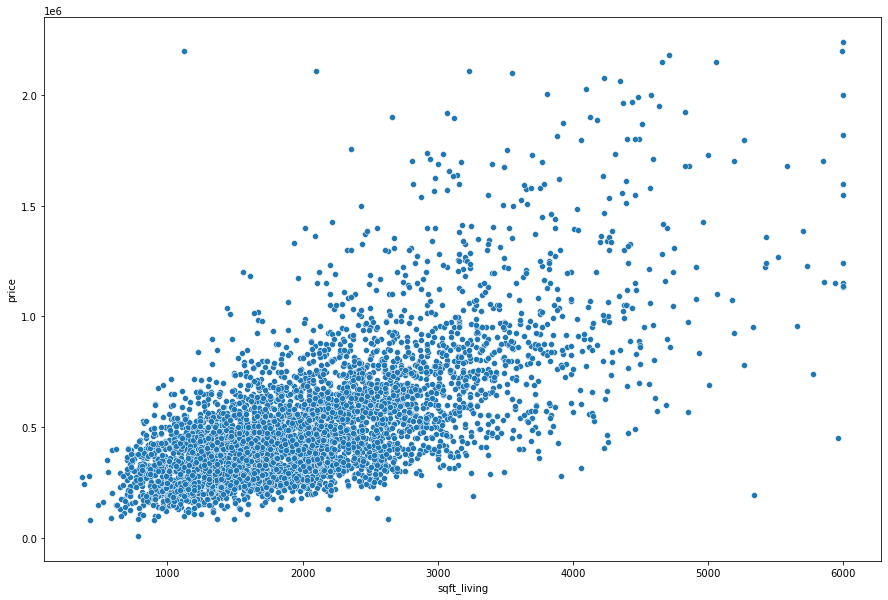

In [22]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x='sqft_living',y='price')

### Observation: No outliers 

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

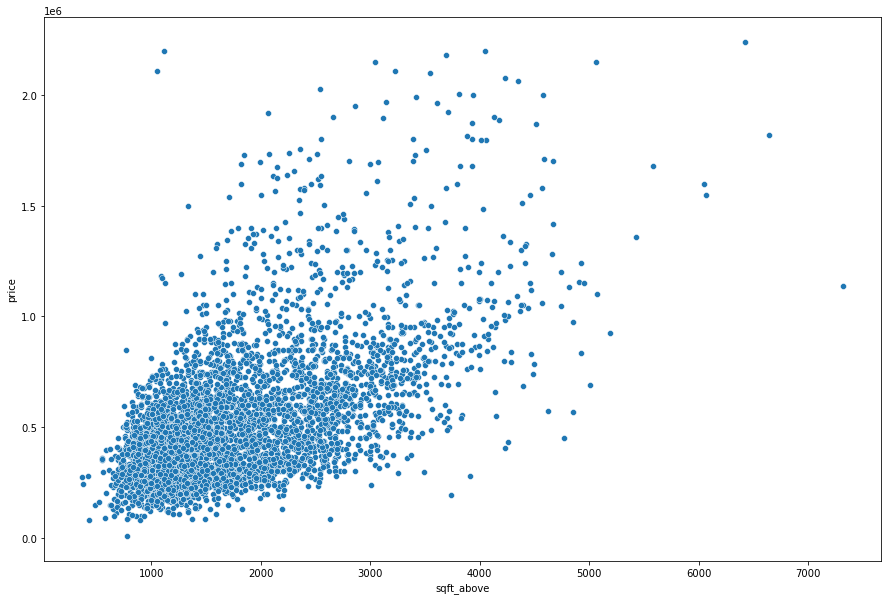

In [23]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x='sqft_above',y='price')

### Observation: There are outliers 

In [24]:
df['sqft_above'] = np.where(df.sqft_above > 5500, 5500, df.sqft_above)

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

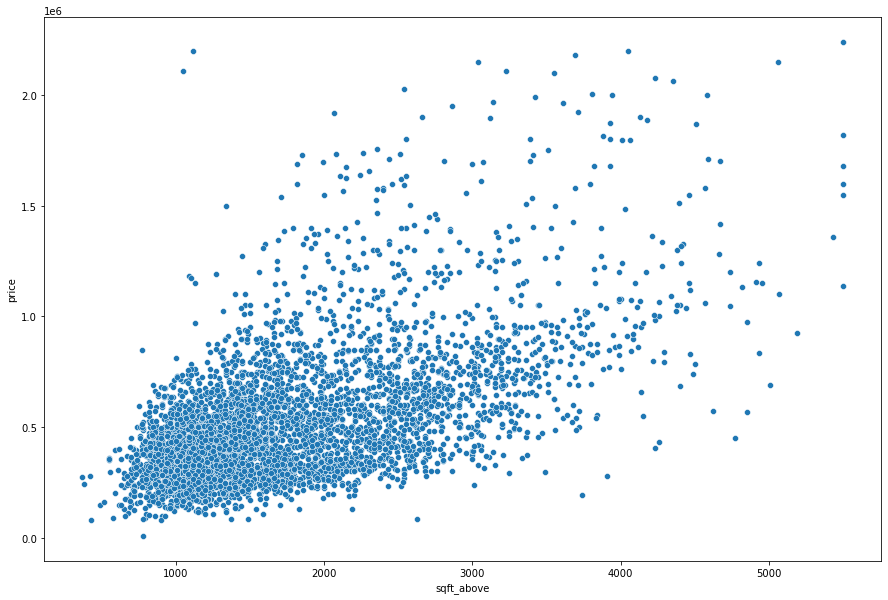

In [25]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x='sqft_above',y='price')

### Observation: No outliers 

<AxesSubplot:xlabel='sqft_basement', ylabel='price'>

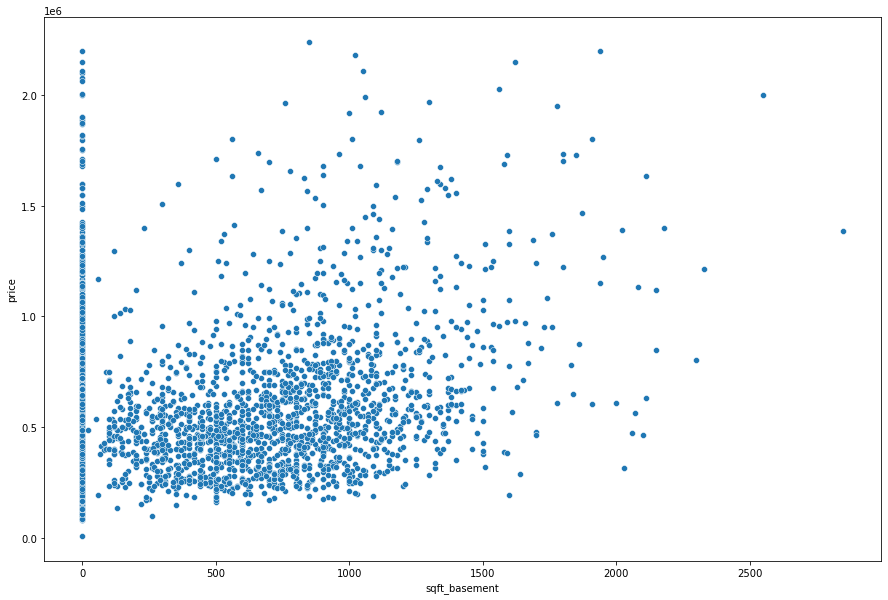

In [26]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x='sqft_basement',y='price')

### Observation: There are outliers 

In [27]:
df['sqft_basement'] = np.where(df.sqft_basement > 2000, 2000, df.sqft_basement)

<AxesSubplot:xlabel='sqft_basement', ylabel='price'>

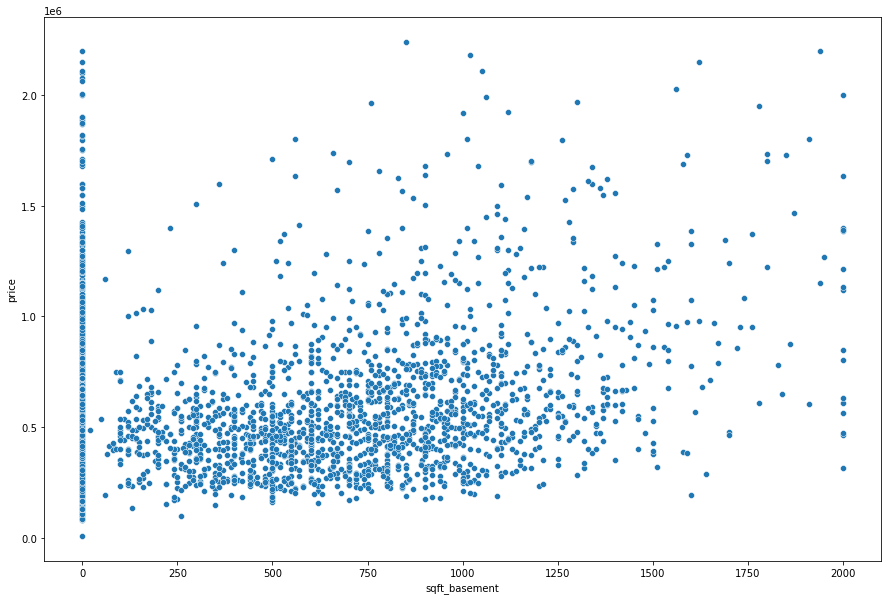

In [28]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x='sqft_basement',y='price')

### Observation: No outliers 

In [29]:
# add basement column 
df['basement'] = np.where(df.sqft_basement == 0, 0, 1)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

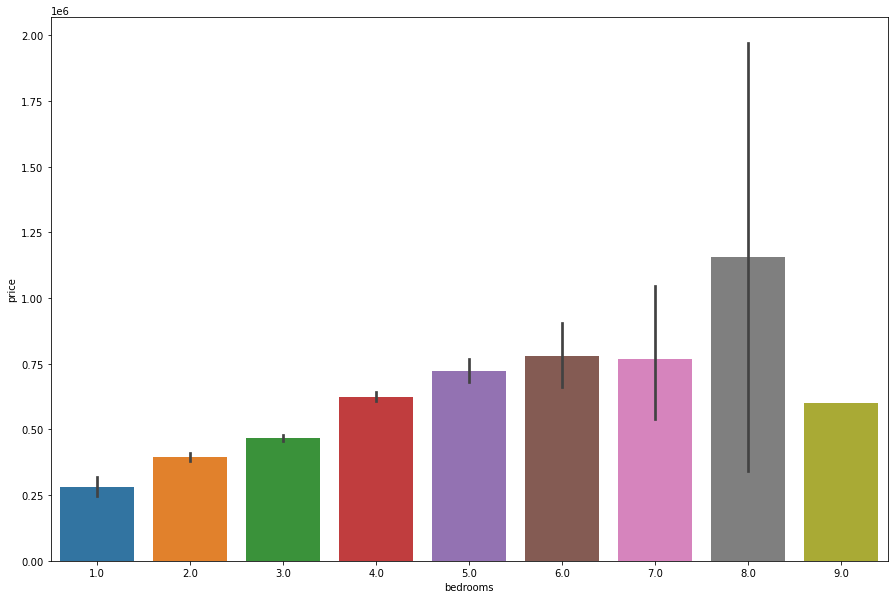

In [30]:
plt.figure(figsize=(15,10))
sns.barplot(data=df, x='bedrooms',y='price')

### Observation: something wrong with 8,9 bedrooms  

In [31]:
df.groupby('bedrooms').price.agg([len,min,max])

,len,min,max
bedrooms,,,
1.0,37,80000.0,540000.0
2.0,561,7800.0,1695000.0
3.0,2019,83300.0,2147500.0
4.0,1499,84350.0,2199900.0
5.0,327,185000.0,2238888.0
6.0,57,175000.0,2180000.0
7.0,12,280000.0,1950000.0
8.0,2,340000.0,1970000.0
9.0,1,599999.0,599999.0


### Observation:  7,8,9 bedrooms are outliers 

In [32]:
# handling outliers 
df['bedrooms'] = np.where(df.bedrooms > 6, 6, df.bedrooms)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

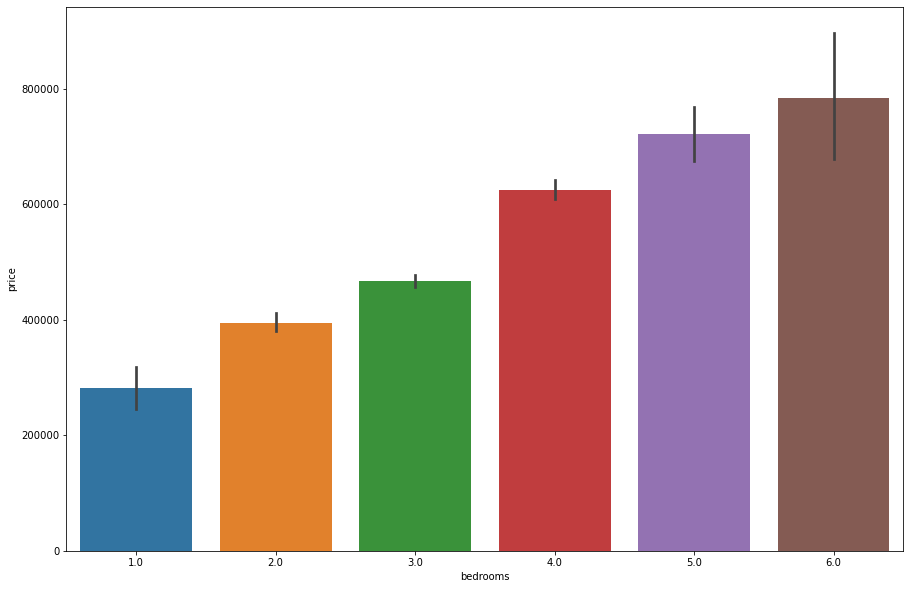

In [33]:
plt.figure(figsize=(15,10))
sns.barplot(data=df, x='bedrooms',y='price')

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

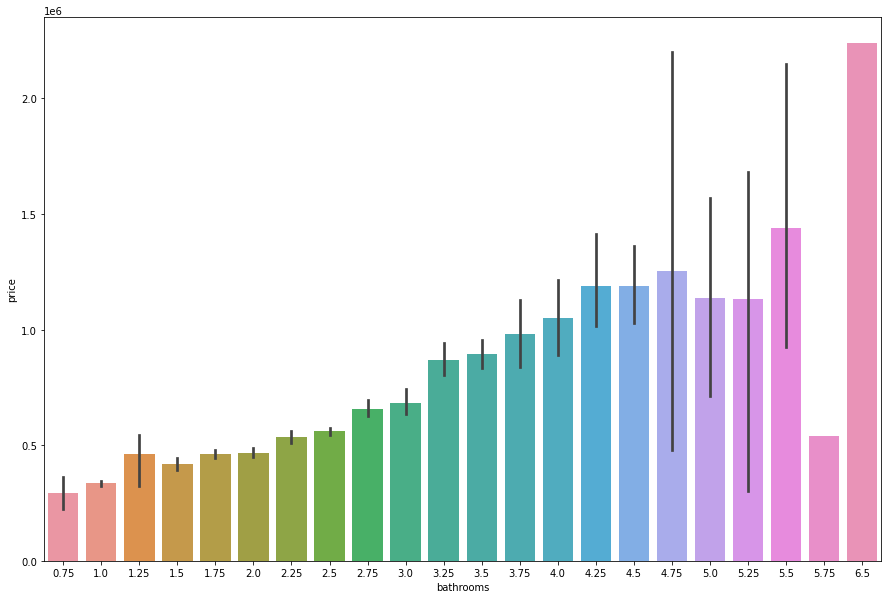

In [34]:
plt.figure(figsize=(15,10))
sns.barplot(data=df, x='bathrooms',y='price')

In [35]:
df.groupby('bathrooms').price.agg([len,min,max])

,len,min,max
bathrooms,,,
0.75,17,80000.0,562100.0
1.00,736,7800.0,2110000.0
1.25,3,321950.0,545000.0
1.50,287,107500.0,2199900.0
1.75,628,120750.0,2100000.0
2.00,424,83300.0,1755000.0
2.25,411,132250.0,2110000.0
2.50,1180,168000.0,1920000.0
2.75,270,188000.0,2180000.0


In [36]:
# handling outliers 
df['bathrooms'] = np.where(df.bathrooms > 4, 4, df.bathrooms)
df['bathrooms'] = np.where(df.bathrooms == 1.25, 1, df.bathrooms)
df['bathrooms'] = np.where(df.bathrooms == 0.75, 1, df.bathrooms)

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

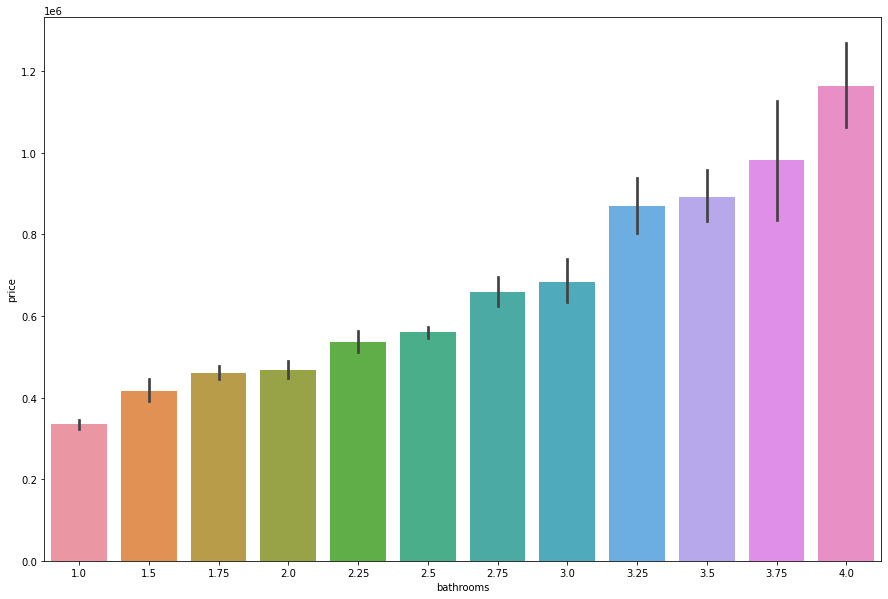

In [37]:
plt.figure(figsize=(15,10))
sns.barplot(data=df, x='bathrooms',y='price')

<AxesSubplot:xlabel='floors', ylabel='price'>

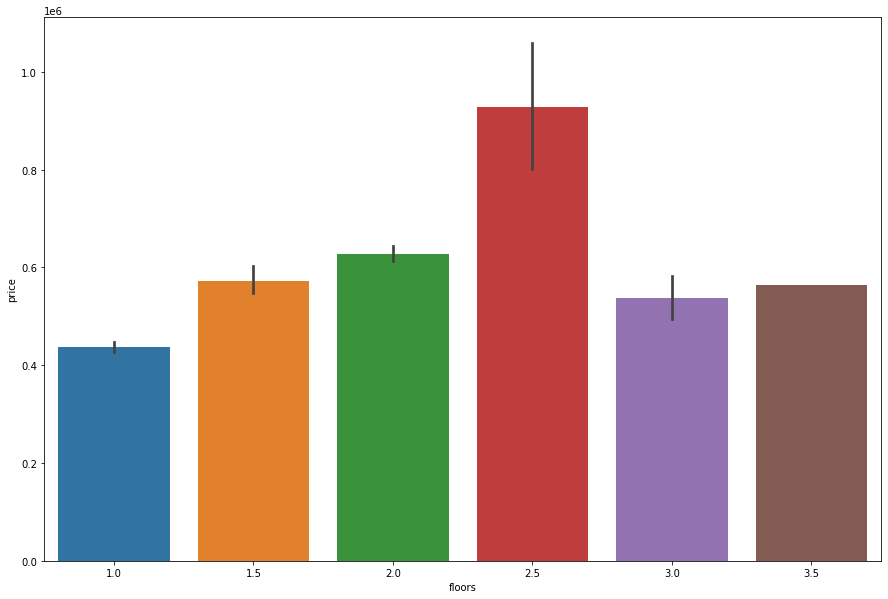

In [38]:
plt.figure(figsize=(15,10))
sns.barplot(data=df, x='floors',y='price')

In [39]:
df.groupby('floors').price.agg([len,min,max])

,len,min,max
floors,,,
1.0,2144,7800.0,2199900.0
1.5,436,132500.0,2027000.0
2.0,1769,84350.0,2238888.0
2.5,40,195000.0,1990000.0
3.0,125,288790.0,2000000.0
3.5,1,563500.0,563500.0


In [40]:
# handling outliers 
df['floors'] = np.where(df.floors > 3, 3, df.floors)

<AxesSubplot:xlabel='floors', ylabel='price'>

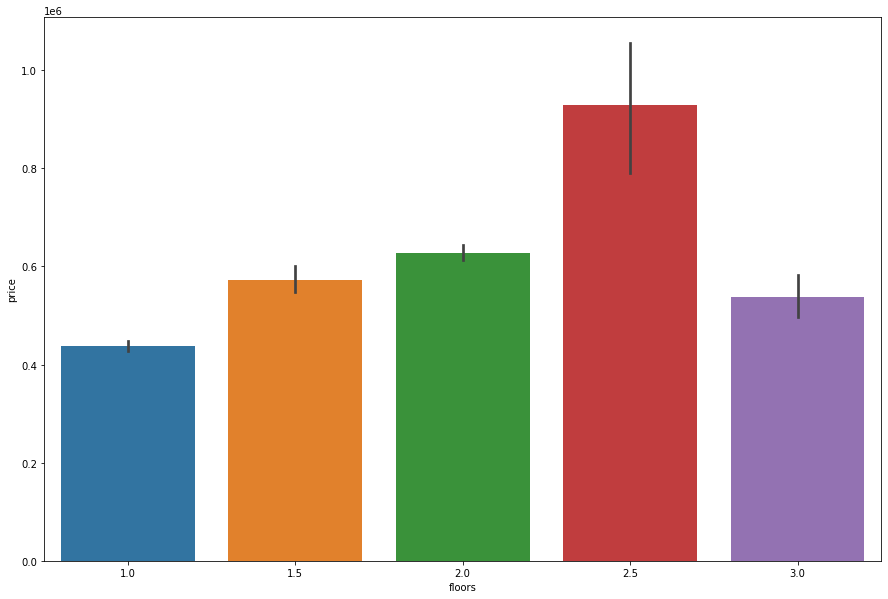

In [41]:
plt.figure(figsize=(15,10))
sns.barplot(data=df, x='floors',y='price')

<AxesSubplot:>

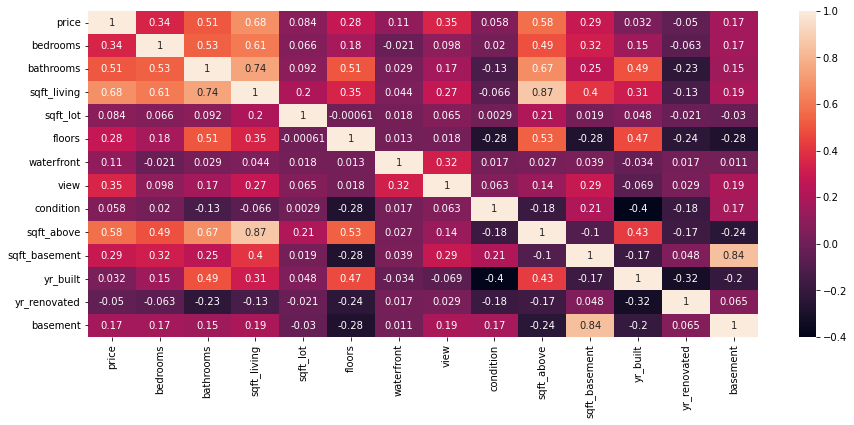

In [43]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), annot=True)

### Observation: 
- (date,yr_built,yr_renovated,sqft_lot) has very low correlation 
- there are high correlated features 


In [44]:
# remove unwanted columns 
df.drop(["date",'yr_built','yr_renovated','sqft_lot'], axis=1, inplace = True)

In [45]:
# remove 1 from any 2 High correlated columns 
df.drop(['waterfront','condition','sqft_above'],axis=1, inplace=True)

## 2- Clean categorical data



In [46]:
df['country'].nunique()

1

### Country will be removed as it add no information 



In [47]:
df['street'].nunique()

4441

In [48]:
df['street'].value_counts()

2520 Mulberry Walk NE     4
2500 Mulberry Walk NE     3
1018 NE 96th St           2
2300 14th Ave S           2
23620 SE 243rd Pl         2
                         ..
33415 41st Ave SW         1
4801-4999 229th Ave SE    1
1505 S Plum St            1
1215 N 50th St            1
18717 SE 258th St         1
Name: street, Length: 4441, dtype: int64

### Street will be removed as it has many unique numinal values



In [49]:
df['city'].nunique()

44

In [50]:
df['statezip'].nunique()

77

In [51]:
df['statezip']

0       WA 98133
2       WA 98042
3       WA 98008
4       WA 98052
5       WA 98115
          ...   
4595    WA 98133
4596    WA 98007
4597    WA 98059
4598    WA 98178
4599    WA 98042
Name: statezip, Length: 4515, dtype: object

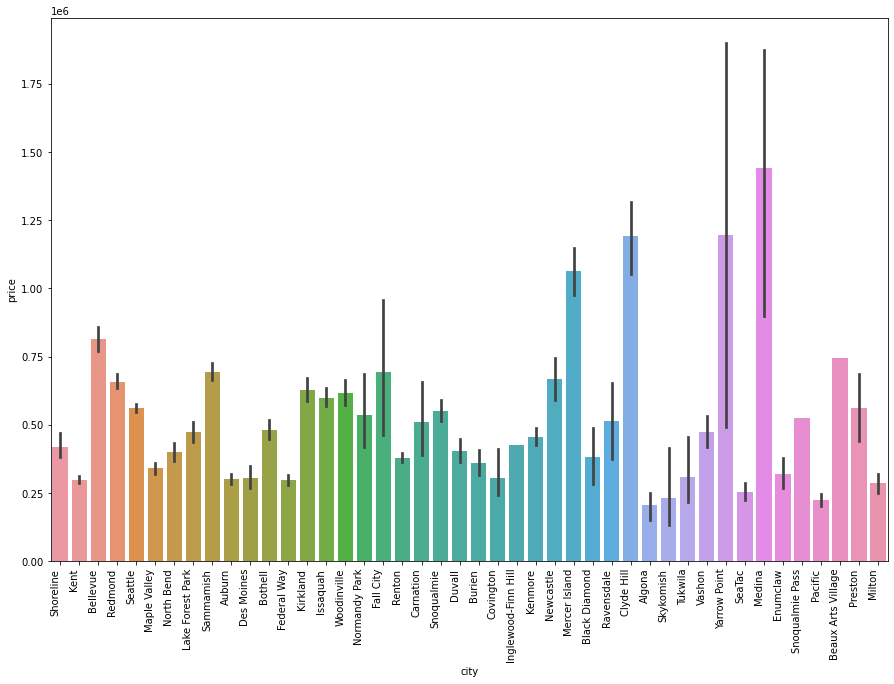

In [52]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="city", y="price", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right");

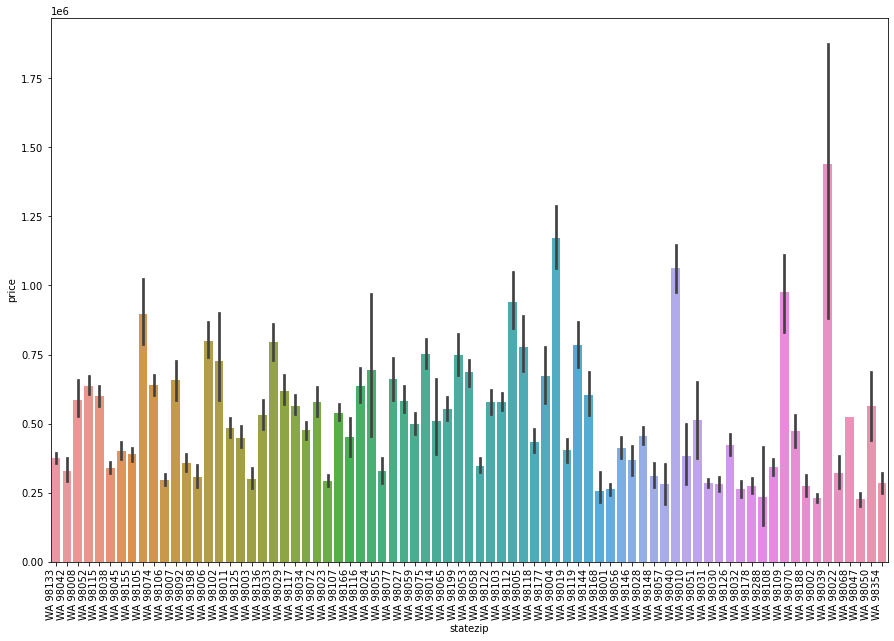

In [53]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="statezip", y="price", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right");

### we will choose only one of them (statezip is better)



In [54]:
# conclusion:

# remove unwanted columns 
df.drop(['street','city','country'],axis=1, inplace=True)

# one hot encoding for nominal features (statezip):
df = pd.get_dummies(df, columns=['statezip'], prefix = ['statezip'])

In [55]:
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,view,sqft_basement,basement,statezip_WA 98001,statezip_WA 98002,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,313000.0,3.0,1.50,1340,1.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,342000.0,3.0,2.00,1930,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,3.0,2.25,2000,1.0,0,1000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,4.0,2.50,1940,1.0,0,800,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,490000.0,2.0,1.00,880,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
